              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1123
           1       0.66      0.62      0.64       877

    accuracy                           0.69      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.69      0.69      0.69      2000



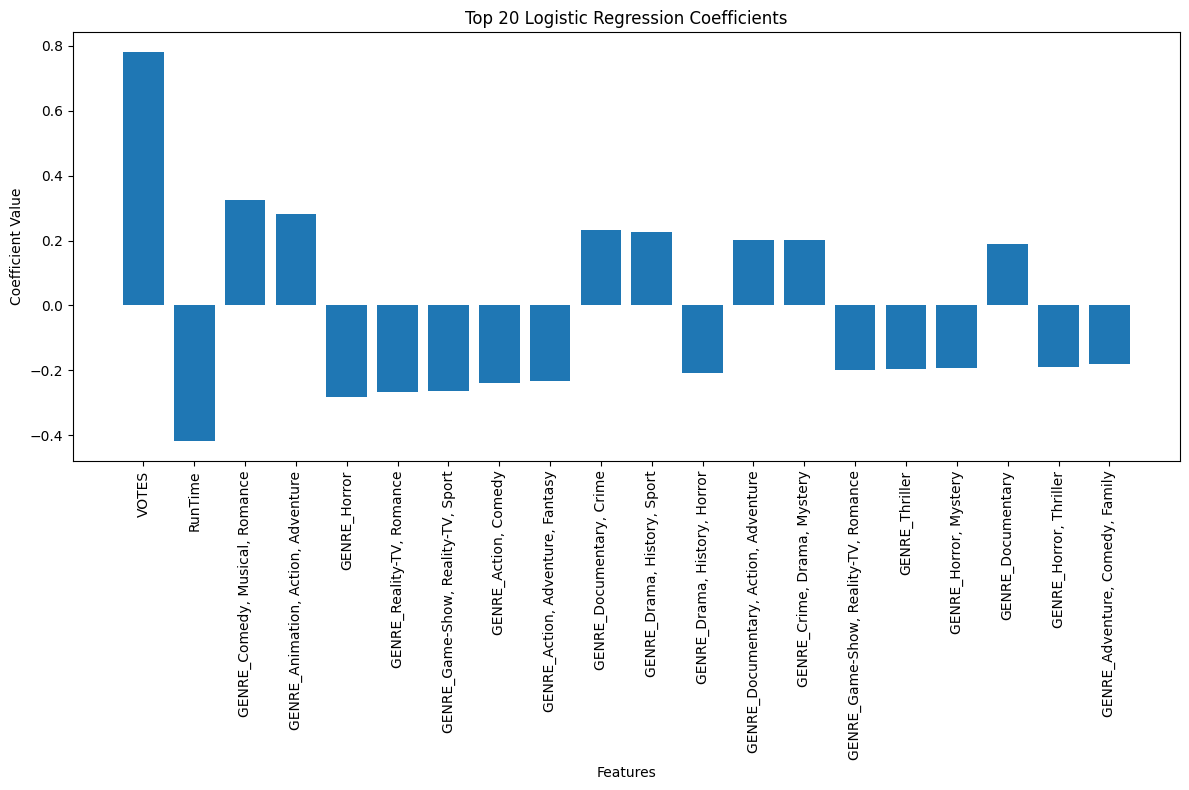

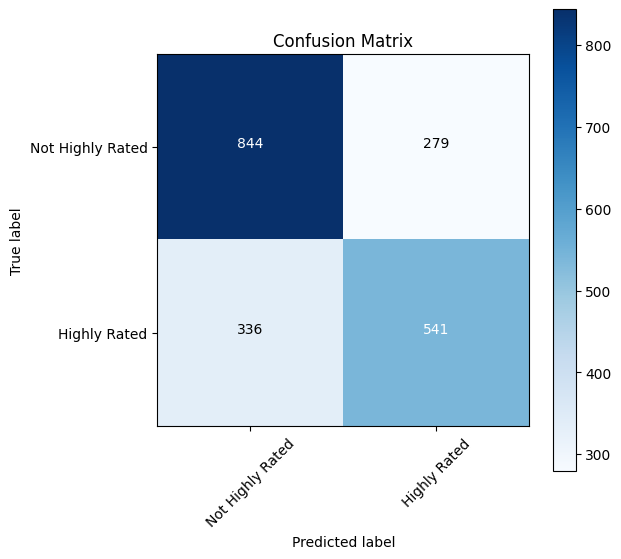

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import itertools

# Data Preprocessing

# Load the CSV file
csv_file_path = './movies.csv'
movies_df = pd.read_csv(csv_file_path)

# Clean data: remove newline characters and extra spaces from string columns
movies_df = movies_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert 'VOTES' to numerical format and handle missing values
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',', '').astype(float)
movies_df['VOTES'] = movies_df['VOTES'].fillna(movies_df['VOTES'].median())

# Create a binary target variable for 'highly rated' (rating >= 7.0)
movies_df['HIGHLY_RATED'] = (movies_df['RATING'] >= 7.0).astype(int)

# Feature Selection
features = ['YEAR', 'GENRE', 'VOTES', 'RunTime']
target = 'HIGHLY_RATED'

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['VOTES', 'RunTime']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['GENRE'])
    ])

# Pipeline with preprocessing and logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())
])

# Split data into training and testing sets
X = movies_df[features]
y = movies_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model_pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualization

# Coefficients Plot
top_n = 20

# Getting absolute values of coefficients for sorting
sorted_coefficients_abs = dict(sorted(coefficients_dict.items(), key=lambda item: abs(item[1]), reverse=True))

# Selecting top N features
top_features = list(sorted_coefficients_abs.keys())[:top_n]
top_coefficients = [sorted_coefficients_abs[feature] for feature in top_features]

# Plotting top N coefficients
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_features)), top_coefficients, align='center')
plt.xticks(range(len(top_features)), top_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Top {top_n} Logistic Regression Coefficients')
plt.tight_layout()
plt.show()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Highly Rated', 'Highly Rated'], rotation=45)
plt.yticks(tick_marks, ['Not Highly Rated', 'Highly Rated'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.show()
